<a href="https://colab.research.google.com/github/MatthewTaylor20/MAT-494/blob/main/HW4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()

Text(0, 0.5, 'Height')

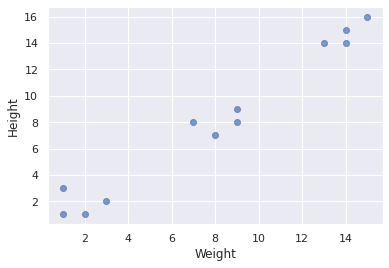

In [7]:
X = np.array([
    [1, 3], [2, 1], [1, 1],
    [3, 2], [7, 8], [9, 8],
    [9, 9], [8, 7], [13, 14],
    [14, 14], [15, 16], [14, 15]
])
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')
plt.xlabel('Weight')
plt.ylabel('Height')

In [8]:
W = pairwise_distances(X, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x < 5 else 0)
W = np.vectorize(vectorizer)(W)
print(W)

[[1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]]


In [9]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

[[0 0 1 0 0 0 0 1 0 1]
 [0 0 1 0 1 1 1 1 0 1]
 [1 1 0 0 0 1 0 0 1 1]
 [0 0 0 0 1 0 1 0 0 0]
 [0 1 0 1 0 0 1 1 1 0]
 [0 1 1 0 0 0 1 1 0 1]
 [0 1 0 1 1 1 0 0 1 1]
 [1 1 0 0 1 1 0 0 0 1]
 [0 0 1 0 1 0 1 0 0 1]
 [1 1 1 0 0 1 1 1 1 0]]


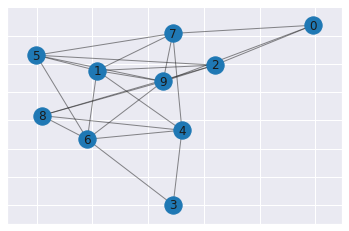

In [10]:
G = nx.random_graphs.erdos_renyi_graph(10, 0.5)
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [11]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)


degree matrix:
[[3 0 0 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 6 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 7]]
laplacian matrix:
[[ 3  0 -1  0  0  0  0 -1  0 -1]
 [ 0  6 -1  0 -1 -1 -1 -1  0 -1]
 [-1 -1  5  0  0 -1  0  0 -1 -1]
 [ 0  0  0  2 -1  0 -1  0  0  0]
 [ 0 -1  0 -1  5  0 -1 -1 -1  0]
 [ 0 -1 -1  0  0  5 -1 -1  0 -1]
 [ 0 -1  0 -1 -1 -1  6  0 -1 -1]
 [-1 -1  0  0 -1 -1  0  5  0 -1]
 [ 0  0 -1  0 -1  0 -1  0  4 -1]
 [-1 -1 -1  0  0 -1 -1 -1 -1  7]]


In [12]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[-0.000 1.574 2.974 8.346 7.931 3.778 4.493 6.889 5.902 6.113]
eigenvectors:
[[-0.316 0.383 0.739 0.073 -0.164 0.269 -0.119 0.120 -0.133 -0.239]
 [-0.316 0.077 -0.170 0.138 -0.588 -0.300 -0.002 -0.476 0.317 -0.289]
 [-0.316 0.226 -0.035 0.151 0.371 0.179 0.507 0.074 0.617 0.108]
 [-0.316 -0.814 0.370 -0.016 -0.096 0.014 0.224 -0.062 0.004 0.190]
 [-0.316 -0.205 -0.162 -0.265 0.082 -0.006 -0.575 0.467 0.381 -0.248]
 [-0.316 0.140 -0.172 -0.033 -0.241 -0.433 0.378 0.585 -0.338 0.072]
 [-0.316 -0.142 -0.199 0.366 0.485 -0.019 0.017 -0.163 -0.397 -0.535]
 [-0.316 0.162 0.095 0.268 0.245 -0.386 -0.430 -0.176 -0.048 0.605]
 [-0.316 0.015 -0.426 0.129 -0.288 0.684 -0.100 -0.005 -0.219 0.305]
 [-0.316 0.159 -0.041 -0.812 0.193 -0.002 0.100 -0.364 -0.184 0.031]]


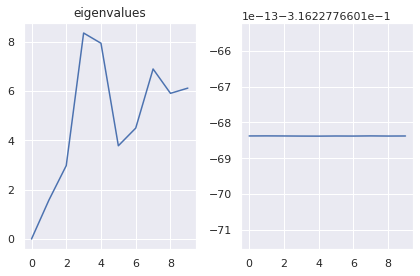

In [13]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
fig.tight_layout()
plt.show()

[[0 1 1 1 1 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 1 0 1]
 [0 0 0 0 0 1 0 1 0]]


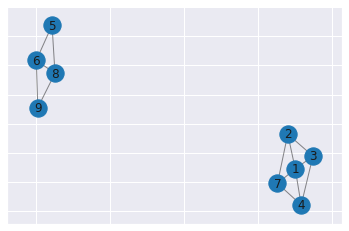

In [14]:
G = nx.Graph()
G.add_edges_from([
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 3],
    [2, 7],
    [3, 4],
    [4, 7],
    [1, 7],
    [6, 5],
    [5, 8],
    [6, 8],
    [9, 8],
    [9, 6]
])
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [15]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[4 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 2]]
laplacian matrix:
[[ 4 -1 -1 -1 -1  0  0  0  0]
 [-1  3 -1  0 -1  0  0  0  0]
 [-1 -1  3 -1  0  0  0  0  0]
 [-1  0 -1  3 -1  0  0  0  0]
 [-1 -1  0 -1  3  0  0  0  0]
 [ 0  0  0  0  0  3 -1 -1 -1]
 [ 0  0  0  0  0 -1  2 -1  0]
 [ 0  0  0  0  0 -1 -1  3 -1]
 [ 0  0  0  0  0 -1  0 -1  2]]


In [16]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[5.000 0.000 5.000 3.000 3.000 4.000 0.000 4.000 2.000]
eigenvectors:
[[0.894 -0.447 0.077 0.000 0.000 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 0.479 0.707 0.392 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 -0.517 -0.000 -0.588 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 0.479 -0.707 -0.392 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 -0.517 0.000 0.588 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.866 -0.500 -0.154 0.000]
 [0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 -0.350 -0.707]
 [0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 0.855 -0.000]
 [0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 -0.350 0.707]]


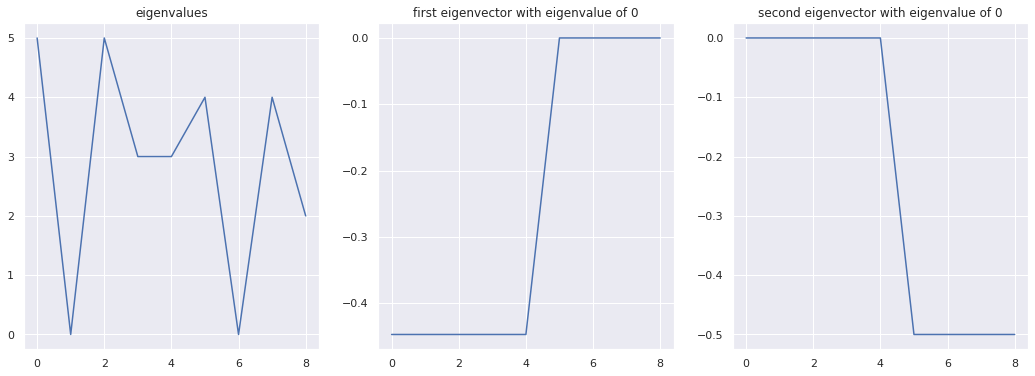

In [17]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(131)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(132)
plt.plot(v[:, i[0]])
ax2.title.set_text('first eigenvector with eigenvalue of 0')
ax3 = plt.subplot(133)
plt.plot(v[:, i[1]])
ax3.title.set_text('second eigenvector with eigenvalue of 0')

[[0 1 1 1 1 0 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0]
 [1 1 0 1 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0]
 [0 1 0 0 0 1 0 1 0 1]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


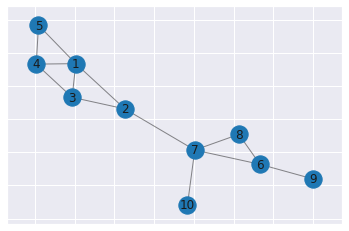

In [18]:
G = nx.Graph()
G.add_edges_from([
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 3],
    [3, 4],
    [4, 5],
    [1, 5],
    [6, 7],
    [7, 8],
    [6, 8],
    [6, 9],
    [9, 6],
    [7, 10],
    [7, 2]
])
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [19]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[4 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]
laplacian matrix:
[[ 4 -1 -1 -1 -1  0  0  0  0  0]
 [-1  3 -1  0  0  0 -1  0  0  0]
 [-1 -1  3 -1  0  0  0  0  0  0]
 [-1  0 -1  3 -1  0  0  0  0  0]
 [-1  0  0 -1  2  0  0  0  0  0]
 [ 0  0  0  0  0  3 -1 -1 -1  0]
 [ 0 -1  0  0  0 -1  4 -1  0 -1]
 [ 0  0  0  0  0 -1 -1  2  0  0]
 [ 0  0  0  0  0 -1  0  0  1  0]
 [ 0  0  0  0  0  0 -1  0  0  1]]


In [20]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[5.485 4.898 4.398 3.801 3.155 -0.000 0.229 0.728 1.913 1.393]
eigenvectors:
[[-0.430 0.773 -0.021 0.068 -0.049 -0.316 -0.320 -0.047 -0.078 0.011]
 [0.478 -0.014 0.232 0.123 -0.532 -0.316 -0.154 0.054 -0.525 -0.130]
 [-0.092 -0.345 -0.592 0.021 0.378 -0.316 -0.303 -0.032 -0.430 -0.033]
 [0.181 -0.104 0.616 -0.207 0.522 -0.316 -0.364 -0.078 0.136 0.066]
 [0.071 -0.231 -0.248 0.077 -0.410 -0.316 -0.387 -0.099 0.656 0.127]
 [0.240 0.203 -0.244 -0.744 -0.028 -0.316 0.338 -0.164 0.083 -0.199]
 [-0.666 -0.401 0.288 -0.187 -0.246 -0.316 0.196 0.201 -0.062 -0.187]
 [0.122 0.068 -0.018 0.517 0.238 -0.316 0.301 0.029 0.244 -0.636]
 [-0.054 -0.052 0.072 0.266 0.013 -0.316 0.438 -0.603 -0.091 0.505]
 [0.148 0.103 -0.085 0.067 0.114 -0.316 0.254 0.739 0.068 0.476]]


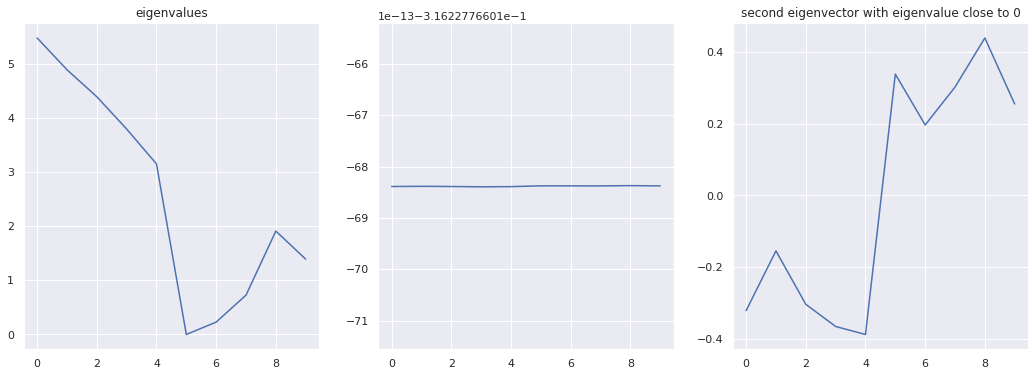

In [21]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(131)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 0.5)[0]
ax2 = plt.subplot(132)
plt.plot(v[:, i[0]])
ax3 = plt.subplot(133)
plt.plot(v[:, i[1]])
ax3.title.set_text('second eigenvector with eigenvalue close to 0')

[[0 1 1 1 1 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 1 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0 0]
 [0 1 0 0 0 1 0 1 0 1 0 1 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 1 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 1 0]]


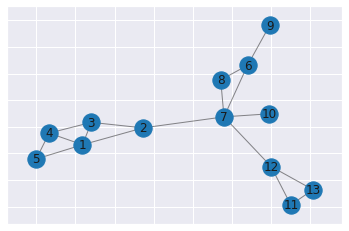

In [22]:
G = nx.Graph()
G.add_edges_from([
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 3],
    [3, 4],
    [4, 5],
    [1, 5],
    [6, 7],
    [7, 8],
    [6, 8],
    [6, 9],
    [9, 6],
    [7, 10],
    [7, 2],
    [11, 12],
    [12, 13],
    [7, 12],
    [11, 13]
])
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())


In [23]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)


degree matrix:
[[4 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2]]
laplacian matrix:
[[ 4 -1 -1 -1 -1  0  0  0  0  0  0  0  0]
 [-1  3 -1  0  0  0 -1  0  0  0  0  0  0]
 [-1 -1  3 -1  0  0  0  0  0  0  0  0  0]
 [-1  0 -1  3 -1  0  0  0  0  0  0  0  0]
 [-1  0  0 -1  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 -1 -1 -1  0  0  0  0]
 [ 0 -1  0  0  0 -1  5 -1  0 -1  0 -1  0]
 [ 0  0  0  0  0 -1 -1  2  0  0  0  0  0]
 [ 0  0  0  0  0 -1  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 -1  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2 -1 -1]
 [ 0  0  0  0  0  0 -1  0  0  0 -1  3 -1]
 [ 0  0  0  0  0  0  0  0  0  0 -1 -1  2]]


In [24]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[6.333 5.020 4.471 3.862 3.535 3.138 1.915 -0.000 0.184 0.348 0.772 1.421
 3.000]
eigenvectors:
[[0.136 -0.867 0.086 -0.015 0.092 0.040 -0.079 -0.277 0.347 0.078 0.040
  -0.009 -0.000]
 [-0.312 0.253 0.318 -0.023 0.299 0.482 -0.527 -0.277 0.205 0.014 -0.054
  0.127 -0.000]
 [0.070 0.189 -0.667 -0.008 -0.073 -0.355 -0.434 -0.277 0.333 0.071 0.025
  0.035 0.000]
 [-0.056 0.231 0.577 0.044 -0.352 -0.473 0.135 -0.277 0.384 0.096 0.069
  -0.062 -0.000]
 [-0.018 0.211 -0.269 -0.016 0.169 0.380 0.661 -0.277 0.403 0.106 0.089
  -0.124 -0.000]
 [-0.220 -0.077 -0.087 0.795 -0.122 0.025 0.077 -0.277 -0.152 -0.355
  0.113 0.214 0.000]
 [0.834 0.166 0.114 0.042 -0.179 0.248 -0.058 -0.277 -0.102 -0.113 -0.185
  0.174 -0.000]
 [-0.142 -0.029 -0.011 -0.450 0.196 -0.240 0.226 -0.277 -0.140 -0.284
  -0.059 0.670 0.000]
 [0.041 0.019 0.025 -0.278 0.048 -0.012 -0.084 -0.277 -0.187 -0.545 0.495
  -0.507 -0.000]
 [-0.156 -0.041 -0.033 -0.015 0.071 -0.116 0.063 -0.277 -0.125 -0.174
  -0.810 -0.4

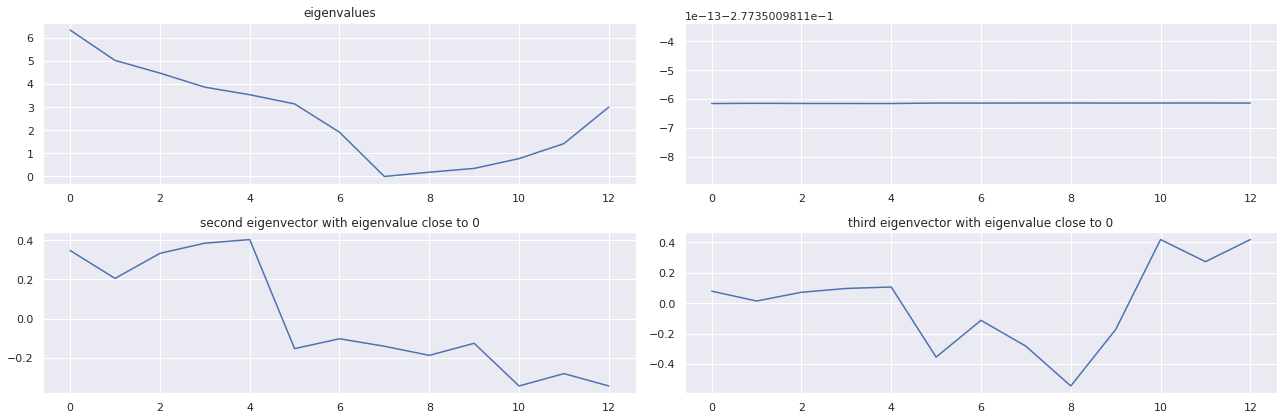

In [25]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(221)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 0.5)[0]
ax2 = plt.subplot(222)
plt.plot(v[:, i[0]])
ax3 = plt.subplot(223)
plt.plot(v[:, i[1]])
ax3.title.set_text('second eigenvector with eigenvalue close to 0')
ax4 = plt.subplot(224)
plt.plot(v[:, i[2]])
ax4.title.set_text('third eigenvector with eigenvalue close to 0')
fig.tight_layout()

In [26]:
U = np.array(v[:, i[1]])
km = KMeans(init='k-means++', n_clusters=3)
km.fit(U)
km.labels_

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0], dtype=int32)

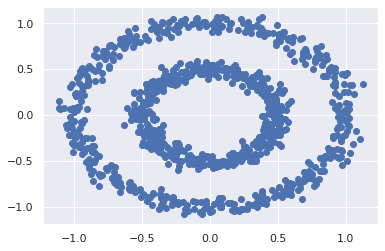

In [27]:
X, clusters = make_circles(n_samples=1000, noise=.05, factor=.5, random_state=0)
plt.scatter(X[:,0], X[:,1])

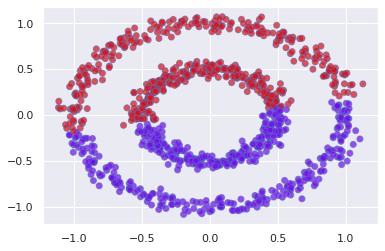

In [28]:
km = KMeans(init='k-means++', n_clusters=2)
km_clustering = km.fit(X)
plt.scatter(X[:,0], X[:,1], c=km_clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


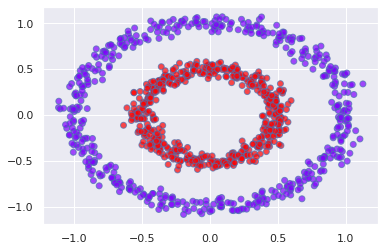

In [29]:
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0)
sc_clustering = sc.fit(X)
plt.scatter(X[:,0], X[:,1], c=sc_clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')